# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

# Importação das bibliotecas


In [30]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

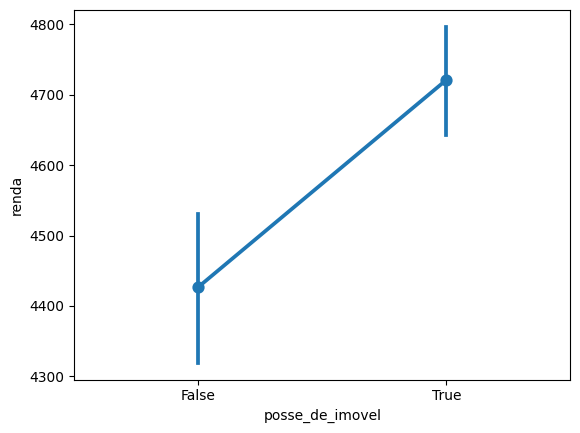

In [19]:
sns.pointplot(x='posse_de_imovel', y='renda', data=df, dodge=True, errorbar=('ci', 90))
plt.show()

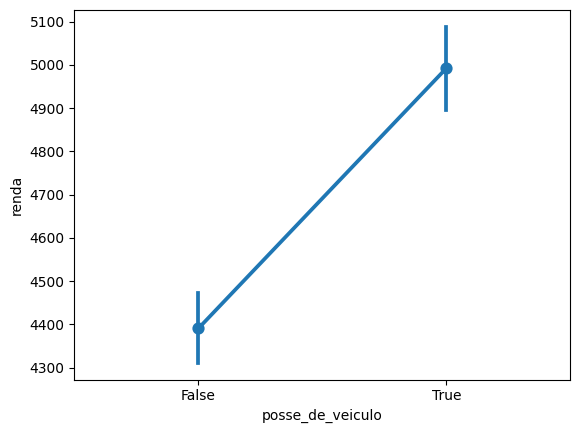

In [20]:
sns.pointplot(x='posse_de_veiculo', y='renda', data=df, dodge=True, errorbar=('ci', 90))
plt.show()

In [21]:
renda_por_veiculo = df.groupby('posse_de_veiculo')['renda'].describe()
print("\nEstatísticas descritivas da renda por posse de veículo:")
print(renda_por_veiculo)


Estatísticas descritivas da renda por posse de veículo:
                   count         mean          std     min      25%      50%  \
posse_de_veiculo                                                               
False             9167.0  4390.506963  4545.776180  159.90  1825.39  3084.09   
True              5833.0  4992.579609  4732.823337  187.69  2143.41  3564.43   

                      75%       max  
posse_de_veiculo                     
False             5306.36  89918.04  
True              6086.56  67794.54  


In [22]:
renda_por_imovel = df.groupby('posse_de_imovel')['renda'].describe()
print("\nEstatísticas descritivas da renda por posse de imóvel:")
print(renda_por_imovel)


Estatísticas descritivas da renda por posse de imóvel:
                   count         mean          std     min        25%  \
posse_de_imovel                                                         
False             4918.0  4426.970482  4569.558384  260.68  1822.4400   
True             10082.0  4721.052704  4654.266817  159.90  2012.2375   

                     50%       75%       max  
posse_de_imovel                               
False            3135.08  5405.255  67794.54  
True             3341.20  5726.260  89918.04  


In [23]:
renda_sem_veiculo = df[df['posse_de_veiculo'] == False]['renda']
renda_com_veiculo = df[df['posse_de_veiculo'] == True]['renda']

In [24]:
renda_sem_imovel = df[df['posse_de_imovel'] == False]['renda']
renda_com_imovel = df[df['posse_de_imovel'] == True]['renda']

In [25]:
ttest_veiculo = ttest_ind(renda_sem_veiculo, renda_com_veiculo, equal_var=False)
print("\nTeste t de Student para posse de veículo:")
print(f"Estatística t: {ttest_veiculo.statistic}, Valor p: {ttest_veiculo.pvalue}")


Teste t de Student para posse de veículo:
Estatística t: -7.712332220715903, Valor p: 1.3324346963629964e-14


In [26]:
ttest_imovel = ttest_ind(renda_sem_imovel, renda_com_imovel, equal_var=False)
print("\nTeste t de Student para posse de imóvel:")
print(f"Estatística t: {ttest_imovel.statistic}, Valor p: {ttest_imovel.pvalue}")


Teste t de Student para posse de imóvel:
Estatística t: -3.677635545954218, Valor p: 0.00023665092205816239


In [27]:
print("\nInterpretação dos Resultados:")


Interpretação dos Resultados:


In [28]:
if ttest_veiculo.pvalue < 0.05:
    print("A posse de veículo discrimina a renda de forma estatisticamente significativa.")
else:
    print("A posse de veículo não discrimina a renda de forma estatisticamente significativa.")


A posse de veículo discrimina a renda de forma estatisticamente significativa.


In [29]:
if ttest_imovel.pvalue < 0.05:
    print("A posse de imóvel discrimina a renda de forma estatisticamente significativa.")
else:
    print("A posse de imóvel não discrimina a renda de forma estatisticamente significativa.")

A posse de imóvel discrimina a renda de forma estatisticamente significativa.
